Business understanding and Data understanding are very critical first couple of steps for any data science project. Read the information given below and also refer to the data dictionary provided separately in an excel file to build your understanding.

## Problem Statement:

A banking institution requires actionable insights from the perspective of Mortgage-Backed Securities, Geographic Business Investment and Real Estate Analysis. 

The objective is to identify white spaces/potential business in the mortgage loan. The mortgage bank would like to identify potential monthly mortgage expenses for each of region based on factors which are primarily monthly family income in a region and rented value of the real estate. Some of the regions are growing rapidly and Competitor banks are selling mortgage loans to subprime customers at a lower interest rate. The bank is strategizing for better market penetration and targeting new customers. A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies. This would help to monitor the key metrics and trends.

The dashboard must demonstrate relationships and trends for the key metrics as follows:  number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics are described not to limit the dashboard to these few only. 

## Dataset Description

Following are the themes the fields fall under Home Owner Costs: Sum of utilities, property taxes.

	Second Mortgage: Households with a second mortgage statistics.
	Home Equity Loan: Households with a Home equity Loan statistics.
	Debt: Households with any type of debt statistics.
	Mortgage Costs: Statistics regarding mortgage payments, home equity loans, utilities and property taxes
	Home Owner Costs: Sum of utilities, property taxes statistics
	Gross Rent: Contract rent plus the estimated average monthly cost of utility features
	Gross Rent as Percent of Income Gross rent as the percent of income very interesting
	High school Graduation: High school graduation statistics.
	Population Demographics: Population demographic statistics.
	Age Demographics: Age demographic statistics.
	Household Income: Total income of people residing in the household.
	Family Income: Total income of people related to the householder.




## Approach :

Following pointers will be helpful to structure your findings.   

1.	Import data 

2.	Figure out the primary key and look for the requirement of indexing

3.	Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable. 



In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
#1.Import Data
#2.Figure out the primary key and look for the requirement of indexing
train_df=pd.read_csv('train.csv',index_col='UID')
test_df=pd.read_csv('test.csv',index_col='UID')

In [3]:
print(train_df.head())
print(test_df.head())

        BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
UID                                                                  
267822      NaN       140        53       36     New York       NY   
246444      NaN       140       141       18      Indiana       IN   
245683      NaN       140        63       18      Indiana       IN   
279653      NaN       140       127       72  Puerto Rico       PR   
247218      NaN       140       161       20       Kansas       KS   

              city           place   type primary  ...  female_age_mean  \
UID                                                ...                    
267822    Hamilton        Hamilton   City   tract  ...         44.48629   
246444  South Bend        Roseland   City   tract  ...         36.48391   
245683    Danville        Danville   City   tract  ...         42.15810   
279653    San Juan        Guaynabo  Urban   tract  ...         47.77526   
247218   Manhattan  Manhattan City   City   tract  ...     

In [4]:
train_df.shape

(27321, 79)

In [5]:
test_df.shape

(11709, 79)

In [6]:
#3.	Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable. 
train_df.isnull().sum()

BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 79, dtype: int64

In [7]:
test_df.isnull().sum()

BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 79, dtype: int64

In [8]:
#As we can see Blokid is completely blank so we will be dropping the whole featutrain_df.drop('BLOCKID',axis=1,inplace=True)
train_df.drop('BLOCKID',axis=1,inplace=True)
test_df.drop('BLOCKID',axis=1,inplace=True)

In [9]:
#Missing Value greater than zero for train data
col_check=train_df.isnull().sum().to_frame().reset_index()
null_col=col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [10]:
#Missing Value greater than zero for test data
col_check=test_df.isnull().sum().to_frame().reset_index()
null_col=col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [11]:
#If the feature have less than 8 unique value then I am consdering as categorical else it will be continuous for train data
for i in null_col:
    if train_df[i].nunique()>8:
        train_df[i].fillna(train_df[i].median(),inplace=True)  #for continuous data
    else: train_df[i].fillna(train_df[i].mode(),inplace=True)  # for categorical data 

In [12]:
#If the feature have less than 8 unique value then I am consdering as categorical else it will be continuous for test data 
for i in null_col:
    if test_df[i].nunique()>8:
        test_df[i].fillna(test_df[i].median(),inplace=True)  #for continuous data
    else: test_df[i].fillna(test_df[i].mode(),inplace=True)  # for categorical data 

In [13]:
train_df.select_dtypes(include='object')

,state,state_ab,city,place,type,primary
UID,,,,,,
267822,New York,NY,Hamilton,Hamilton,City,tract
246444,Indiana,IN,South Bend,Roseland,City,tract
245683,Indiana,IN,Danville,Danville,City,tract
279653,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract
247218,Kansas,KS,Manhattan,Manhattan City,City,tract
...,...,...,...,...,...,...
279212,Puerto Rico,PR,Coamo,Coamo,Urban,tract
277856,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,tract
233000,Colorado,CO,Weldona,Saddle Ridge,City,tract


In [14]:
#label encoding for test and train data
le=LabelEncoder()
train_df['state']=le.fit_transform(train_df['state'])
train_df['state_ab']=le.fit_transform(train_df['state_ab'])
train_df['city']=le.fit_transform(train_df['city'])
train_df['place']=le.fit_transform(train_df['place'])
train_df['type']=le.fit_transform(train_df['type'])
train_df['primary']=le.fit_transform(train_df['primary'])


test_df['state']=le.fit_transform(test_df['state'])
test_df['state_ab']=le.fit_transform(test_df['state_ab'])
test_df['city']=le.fit_transform(test_df['city'])
test_df['place']=le.fit_transform(test_df['place'])
test_df['type']=le.fit_transform(test_df['type'])
test_df['primary']=le.fit_transform(test_df['primary'])

### •	Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to roughly 50%.

In [15]:
top_2500=train_df[train_df['pct_own']>0.10]

In [16]:
top_2500[top_2500['second_mortgage']<0.50].sort_values(by='second_mortgage',ascending=False).head(2500)[['state','second_mortgage','pct_own']]

,state,second_mortgage,pct_own
UID,,,
251185,21,0.43363,0.20247
269323,32,0.31818,0.15618
251324,20,0.30212,0.22380
235788,9,0.28972,0.11618
242304,13,0.28899,0.14228
...,...,...,...
225977,4,0.06818,0.44682
261444,33,0.06818,0.12827
251433,20,0.06815,0.84707


### •	Bad debt is the debt you should avoid at all costs such as a second mortgage or home equity loan. Conversely, Good debt is all other debt not including second mortgage or home equity loan.
Bad Debt Equation:
Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 


In [17]:
train_df['Bad_Debt']= train_df.second_mortgage + train_df.home_equity - train_df.home_equity_second_mortgage

### •	Create pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan).

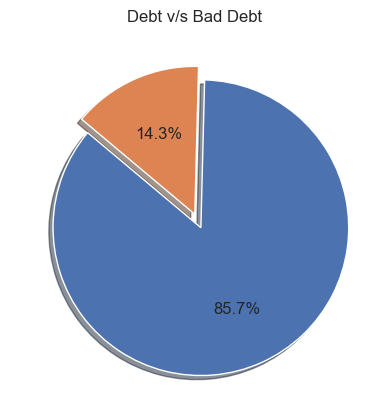

In [18]:
debt_ratio=[train_df['debt'].mean()*100,train_df.Bad_Debt.mean()*100]

plt.pie(debt_ratio,autopct='%1.1f%%',shadow=True, startangle=140,explode=(0.1,0))
labels='Debt','Bad_Debt'
plt.title('Debt v/s Bad Debt')
plt.show()

### •	Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities. 

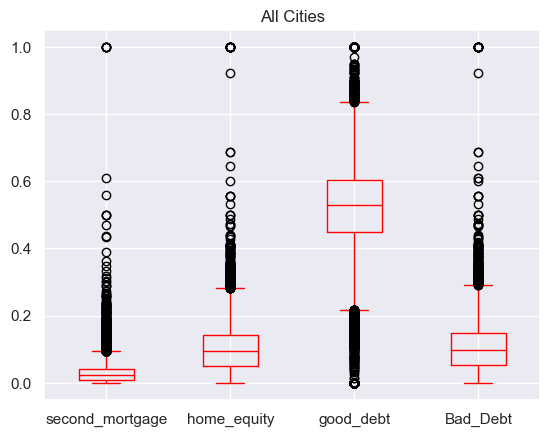

In [19]:
train_df['good_debt']=train_df.debt-train_df.Bad_Debt
boxplot_list=train_df.loc[:,['second_mortgage','home_equity','good_debt','Bad_Debt']]
boxplot_list.plot(kind='box',color='red')
plt.title('All Cities')
plt.show()

### •	Create a collated income distribution chart for family income, house hold income and remaining income. 



In [20]:
train_df['remaining_income']=train_df.family_mean-train_df.hi_mean

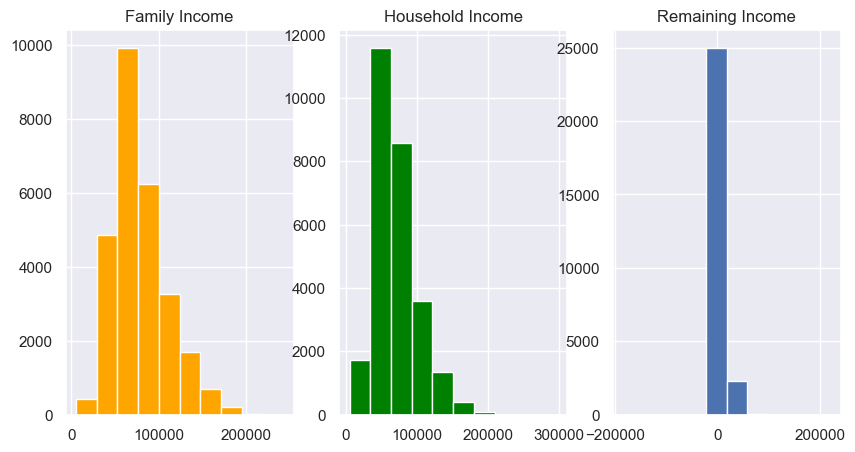

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(train_df.family_mean,color='orange')
plt.title('Family Income')
plt.subplot(1,3,2)
plt.hist(train_df.hi_mean,color='green')
plt.title('Household Income')
plt.subplot(1,3,3)
plt.hist(train_df.remaining_income,color='b')
plt.title('Remaining Income')

plt.show()

### 5.	Perform EDA and come out with insights into population density and age. You may require deriving new fields (Make sure to weight averages for accurate measurements): 

•	Population density (hint-use ‘pop’ and ‘Aland’ to calculate)
•	median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)
Visualize the findings using appropriate chart type.


In [22]:
train_df['population_density'] = train_df['pop'] / train_df['ALand']

In [23]:
train_df.population_density

UID
267822    0.000026
246444    0.001687
245683    0.000099
279653    0.002442
247218    0.002207
            ...   
279212    0.002650
277856    0.000818
233000    0.000002
287425    0.000619
265371    0.000478
Name: population_density, Length: 27321, dtype: float64

In [24]:
train_df['median_age']=((train_df['male_age_median']*train_df['male_pop'])+(train_df['female_age_median']*train_df['female_pop']))/(train_df['male_pop']+train_df['female_pop'])

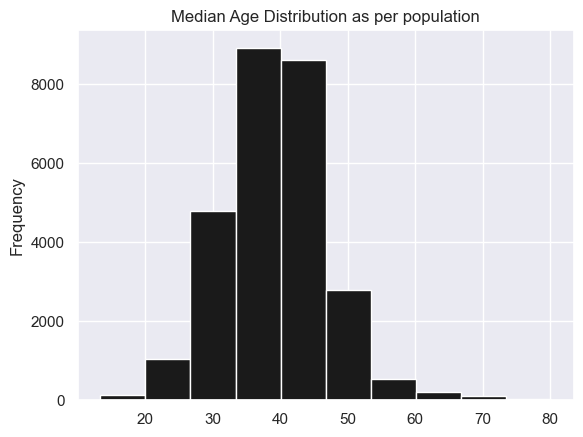

In [25]:
train_df['median_age'].plot(kind='hist',color='k')
plt.title('Median Age Distribution as per population')
sns.set()

### 6.	Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis. Analyze the married, separated and divorced population for these population brackets. Visualize using appropriate chart type.

In [26]:
label=['very low','low','medium','high','very high']
train_df['bins_pop']=pd.cut(train_df['pop'],bins=5,labels=label)

In [27]:
train_df['bins_pop'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: bins_pop, dtype: int64

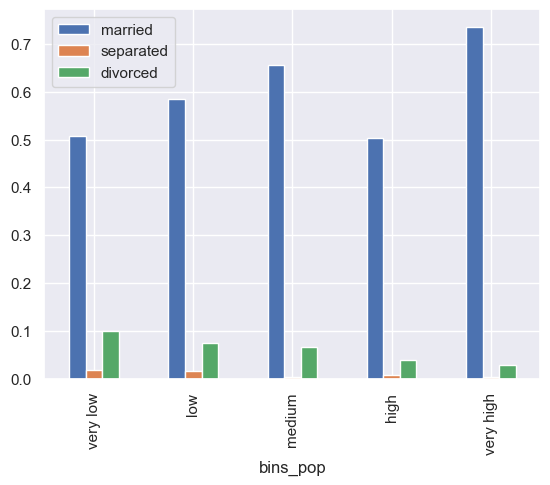

In [28]:
train_df.groupby('bins_pop')[['married','separated','divorced']].agg('mean').plot(kind='bar')
plt.show()

### 7.	Please detail your observations for rent as a percentage of income at an overall level and for different states.

<Figure size 1500x500 with 0 Axes>

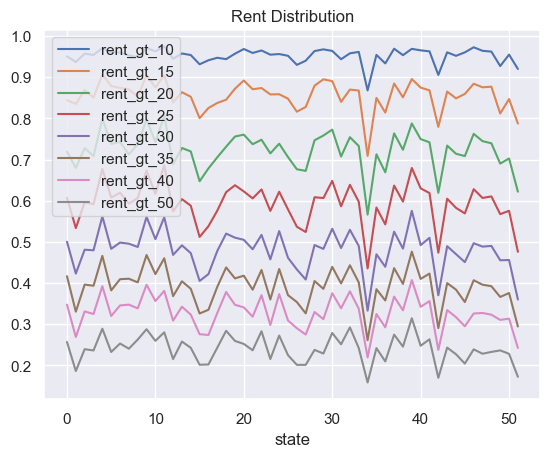

In [29]:
plt.figure(figsize=(15,5))
train_df.groupby('state')[['rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50']].mean().plot(kind='line')
plt.title('Rent Distribution')
plt.show()

In [30]:
train_df.groupby('state')[['rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50']].mean()

,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50
state,,,,,,,,
0,0.950386,0.844273,0.719217,0.607006,0.500425,0.416685,0.347587,0.257099
1,0.936726,0.834884,0.679501,0.533500,0.423091,0.330604,0.269111,0.186501
2,0.957115,0.868743,0.727578,0.596558,0.481035,0.396416,0.331201,0.239571
3,0.953770,0.850264,0.708170,0.591455,0.479598,0.393488,0.324969,0.236401
4,0.970634,0.906418,0.799118,0.676884,0.561863,0.466063,0.392458,0.289235
5,0.961202,0.878320,0.737864,0.607736,0.483205,0.382277,0.320092,0.232722
6,0.959876,0.874055,0.742666,0.619296,0.498329,0.409468,0.345710,0.253288
7,0.952510,0.870289,0.712455,0.592785,0.495594,0.410599,0.347674,0.240782
8,0.948496,0.853058,0.737315,0.606494,0.487698,0.401783,0.338677,0.262865


### 8.	Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings. 

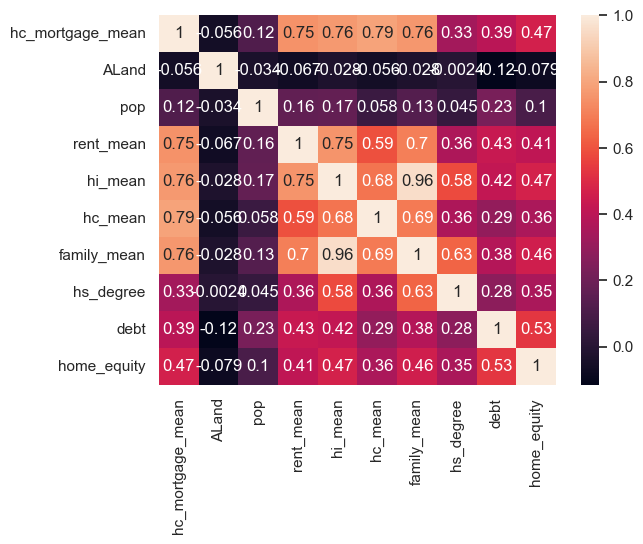

In [31]:
sns.heatmap(train_df[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),mask=None,annot=True)
plt.show()

### 9.	The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. Each variable is assumed to depend on a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as "specific variance" because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data
	Highschool graduation rates
	Median population age
	Second Mortgage Statistics
	Percent Own
	Bad Debt Expense


In [32]:
data=train_df.drop(['hc_mortgage_mean','bins_pop'],axis=1)
data.dropna(inplace=True)

In [33]:
#factor analysis on data 
from sklearn.decomposition import FactorAnalysis
fa=FactorAnalysis()
fa_data=fa.fit_transform(data)
fa.components_

array([[ 2.19145249e-08,  1.65576240e+00, -4.37262856e-01, ...,
         9.41668602e-01, -6.03072979e-05,  3.74168997e-02],
       [-1.55657220e-24,  9.52524263e-01, -1.04143262e-01, ...,
        -1.88404381e+01, -2.00772555e-04,  3.31421507e-01],
       [ 7.40816201e-26, -7.66601027e+00, -1.28181295e+00, ...,
         1.26677541e+03, -1.90367100e-04,  2.15619467e+00],
       ...,
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

### 10.	Build a linear Regression model to predict the total monthly expenditure for home mortgages loan

Column hc_mortgage_mean is predicted variable. This is mean monthly mortgage and owner costs of specified geographical location.
Note: Exclude loans from prediction model which have NaN values for hc_mortgage_mean. NaN represents not a number/missing values.

•	Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step
•	Run another model at State level. There are 52 states in USA.

Considerations: Keep below considerations while building a linear regression model

•	Variables should have significant impact on predicting Monthly mortgage and owner costs
•	Utilize all predictor variable to start with initial hypothesis
•	R square of 60% and above should be achieved
•	Ensure Multi-collinearity does not exist in dependent variables
•	Test if predicted variable is normally distributed



In [34]:
#splitting the data 
x_train=train_df.drop(['hc_mortgage_mean','median_age','bins_pop','Bad_Debt','good_debt', 'population_density'],axis=1)
y_train=train_df['hc_mortgage_mean']

In [35]:
#Using RFE for feature selection as we have multiple features included in our dataset
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LinearRegression()).fit(x_train, y_train)

print(x_train.columns[rfe.support_])
print('Total Features Representing the data',rfe.n_features_)

Index(['STATEID', 'state_ab', 'type', 'lat', 'lng', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'female_age_mean',
       'female_age_median', 'female_age_stdev', 'pct_own', 'married',
       'married_snp', 'separated', 'divorced'],
      dtype='object')
Total Features Representing the data 39


As we can see through the RFE only 39 features are best representator towards our predicted variable

In [36]:
feature_cols=['STATEID', 'state_ab', 'type', 'lat', 'lng', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'female_age_mean',
       'female_age_median', 'female_age_stdev', 'pct_own', 'married',
       'married_snp', 'separated', 'divorced']

In [37]:
x_train=train_df[feature_cols]
y_train=train_df['hc_mortgage_mean']

x_test=test_df[feature_cols]
y_test=test_df['hc_mortgage_mean']

In [38]:
#scaling the data
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [39]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression()

In [40]:
y_pred=linereg.predict(x_test_scaled)

In [41]:
#Evaluation Part
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred)*100 ,'%')
print("Overall mean_absolute_error score of linear regression model", mean_absolute_error(y_test,y_pred))

Overall R2 score of linear regression model 98.66029390631469 %
Overall mean_absolute_error score of linear regression model 45.65359027510659


In [43]:
train_df.to_csv('train_df.csv')

11.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a)	Box plot of distribution of average rent by type of place (Village, urban, town etc.)

b)	Pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan)

c)	Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map.

d)	Heat map for correlation matrix

e)	Pie chart to show the population distribution across different types of places (Village, urban, town etc.)








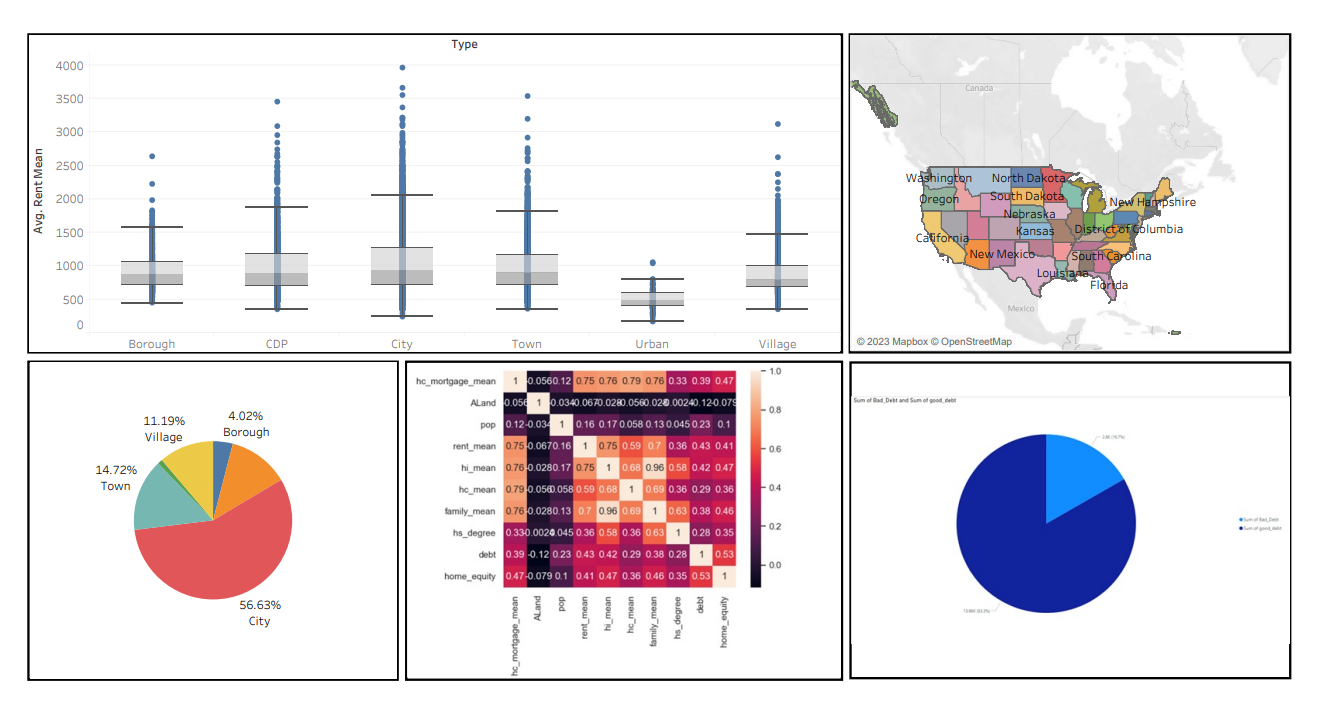

In [4]:
from IPython import display
display.Image("C:\Programming\Data Science Bootcamp project\Project 1\Dashboard_img.PNG")